- 目标：
    - 归纳出窃漏电用户的关键特征，构建窃漏电用户的识别模型
    - 利用实时检测数据，调用窃漏电用户识别模型实现实时诊断

- 主要步骤：
    - 剔除不可能存在窃漏电行为的类别用户
    - 数据探索与预处理
    - 提取特征指标
    - 建立模型

In [2]:
'''拉格朗日插值'''
import pandas as pd
from scipy.interpolate import lagrange

inputfile = r'D:\Python Data\chapter6\test\data\missing_data.xls'
outputfile = r'D:\Python Data\chapter6\test\tmp\missing_data_processed.xls'

data = pd.read_excel(inputfile,header=None)

# 自定义插值函数
def ployinterp_column(series, n, k=5):
    y = series[list(range(n-k, n)) + list(range(n+1, n+k+1))]    # 取 n 的前 5 个数和后 5 个数
    y = y[y.notnull()]    # 剔除空值
    return lagrange(y.index, list(y))(n)

# 逐元素判断是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data[i][j] = ployinterp_column(data[i], j)

data.to_excel(outputfile, header=None, index=False)

d:\python 3.7\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [3]:
'''原始数据分为训练数据和测试数据'''
from random import shuffle

datafile = r'D:\Python Data\chapter6\test\data\model.xls'
data = pd.read_excel(datafile)
data = data.values
shuffle(data)

p = 0.8
train = data[:int(len(data)*p), :]
test = data[int(len(data)*p):, :]

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.6738
Epoch 2/1000
232/232 [==============================] - 0s 709us/step - loss: 0.5889
Epoch 3/1000
232/232 [==============================] - 0s 741us/step - loss: 0.5431
Epoch 4/1000
232/232 [==============================] - 0s 673us/step - loss: 0.5118
Epoch 5/1000
232/232 [==============================] - 0s 801us/step - loss: 0.4847
Epoch 6/1000
232/232 [==============================] - 0s 801us/step - loss: 0.4614 0s - loss: 0.44
Epoch 7/1000
232/232 [==============================] - 0s 750us/step - loss: 0.4442
Epoch 8/1000
232/232 [==============================] - 0s 875us/step - loss: 0.4209
Epoch 9/1000
232/232 [==============================] - 0s 808us/step - loss: 0.4070
Epoch 10/1000
232/232 [==============================] - 0s 741us/step - loss: 0.3937
Epoch 11/1000
232/232 [============

Epoch 79/1000
232/232 [==============================] - 0s 683us/step - loss: 0.2202
Epoch 80/1000
232/232 [==============================] - 0s 606us/step - loss: 0.2232
Epoch 81/1000
232/232 [==============================] - 0s 673us/step - loss: 0.2212
Epoch 82/1000
232/232 [==============================] - ETA: 0s - loss: 0.241 - 0s 653us/step - loss: 0.2216
Epoch 83/1000
232/232 [==============================] - 0s 701us/step - loss: 0.2213
Epoch 84/1000
232/232 [==============================] - 0s 749us/step - loss: 0.2195
Epoch 85/1000
232/232 [==============================] - 0s 700us/step - loss: 0.2203
Epoch 86/1000
232/232 [==============================] - 0s 750us/step - loss: 0.2200
Epoch 87/1000
232/232 [==============================] - 0s 741us/step - loss: 0.2218
Epoch 88/1000
232/232 [==============================] - 0s 720us/step - loss: 0.2232
Epoch 89/1000
232/232 [==============================] - 0s 673us/step - loss: 0.2183
Epoch 90/1000
232/232 [=======

232/232 [==============================] - 0s 606us/step - loss: 0.2008
Epoch 173/1000
232/232 [==============================] - 0s 606us/step - loss: 0.2007
Epoch 174/1000
232/232 [==============================] - 0s 673us/step - loss: 0.2001
Epoch 175/1000
232/232 [==============================] - 0s 606us/step - loss: 0.2012
Epoch 176/1000
232/232 [==============================] - 0s 646us/step - loss: 0.2039 0s - loss: 0.22
Epoch 177/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1990
Epoch 178/1000
232/232 [==============================] - 0s 620us/step - loss: 0.2004
Epoch 179/1000
232/232 [==============================] - 0s 714us/step - loss: 0.1992
Epoch 180/1000
232/232 [==============================] - 0s 808us/step - loss: 0.1988
Epoch 181/1000
232/232 [==============================] - 0s 855us/step - loss: 0.2000
Epoch 182/1000
232/232 [==============================] - 0s 808us/step - loss: 0.2002
Epoch 183/1000
232/232 [==================

232/232 [==============================] - 0s 650us/step - loss: 0.1868
Epoch 359/1000
232/232 [==============================] - 0s 612us/step - loss: 0.1860
Epoch 360/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1841
Epoch 361/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1841
Epoch 362/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1850
Epoch 363/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1851
Epoch 364/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1898
Epoch 365/1000
232/232 [==============================] - 0s 649us/step - loss: 0.1865 0s - loss: 0.159
Epoch 366/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1835
Epoch 367/1000
232/232 [==============================] - 0s 616us/step - loss: 0.1859
Epoch 368/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1843
Epoch 369/1000
232/232 [=================

232/232 [==============================] - 0s 606us/step - loss: 0.1752
Epoch 545/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1753
Epoch 546/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1757
Epoch 547/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1742
Epoch 548/1000
232/232 [==============================] - 0s 646us/step - loss: 0.1748
Epoch 549/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1723
Epoch 550/1000
232/232 [==============================] - 0s 644us/step - loss: 0.1755
Epoch 551/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1752
Epoch 552/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1741
Epoch 553/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1765
Epoch 554/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1727
Epoch 555/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 606us/step - loss: 0.1727
Epoch 639/1000
232/232 [==============================] - 0s 678us/step - loss: 0.1726
Epoch 640/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1723
Epoch 641/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1712
Epoch 642/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1720
Epoch 643/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1748
Epoch 644/1000
232/232 [==============================] - 0s 690us/step - loss: 0.1727
Epoch 645/1000
232/232 [==============================] - 0s 629us/step - loss: 0.1732
Epoch 646/1000
232/232 [==============================] - 0s 635us/step - loss: 0.1728
Epoch 647/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1733
Epoch 648/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1730
Epoch 649/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 606us/step - loss: 0.1711
Epoch 733/1000
232/232 [==============================] - 0s 651us/step - loss: 0.1694
Epoch 734/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1709
Epoch 735/1000
232/232 [==============================] - 0s 590us/step - loss: 0.1682
Epoch 736/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1710
Epoch 737/1000
232/232 [==============================] - 0s 652us/step - loss: 0.1739
Epoch 738/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1731
Epoch 739/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1711
Epoch 740/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1691
Epoch 741/1000
232/232 [==============================] - 0s 652us/step - loss: 0.1690
Epoch 742/1000
232/232 [==============================] - 0s 616us/step - loss: 0.1720
Epoch 743/1000
232/232 [==============================] - 

232/232 [==============================] - 0s 606us/step - loss: 0.1663
Epoch 827/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1713
Epoch 828/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1680
Epoch 829/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1658
Epoch 830/1000
232/232 [==============================] - 0s 650us/step - loss: 0.1658
Epoch 831/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1691
Epoch 832/1000
232/232 [==============================] - 0s 615us/step - loss: 0.1693
Epoch 833/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1676
Epoch 834/1000
232/232 [==============================] - 0s 606us/step - loss: 0.1718
Epoch 835/1000
232/232 [==============================] - 0s 673us/step - loss: 0.1670
Epoch 836/1000
232/232 [==============================] - 0s 645us/step - loss: 0.1685
Epoch 837/1000
232/232 [==============================] - 

<IPython.core.display.Javascript object>


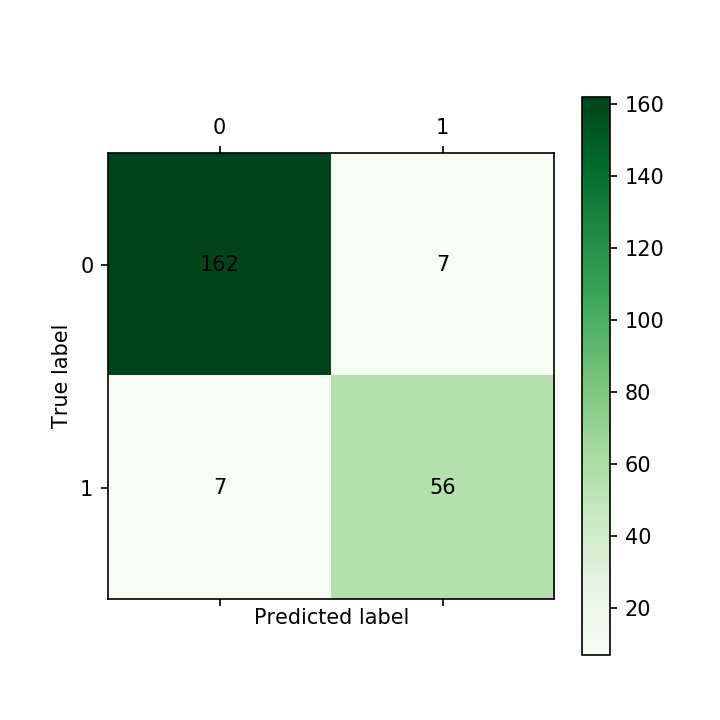

In [4]:
'''LM 神经网络'''
from keras.models import Sequential
from keras.layers.core import Dense, Activation

netfile = r'D:\Python Data\chapter6\test\tmp\net.model'

net = Sequential()
net.add(Dense(input_dim=3, units=10))
net.add(Activation('relu'))
net.add(Dense(input_dim=10, units=1))
net.add(Activation('sigmoid'))
net.compile(loss = 'binary_crossentropy', optimizer='adam')
net.fit(train[:,:3], train[:,3], epochs=1000, batch_size=1)
net.save_weights(netfile)

predict_result = net.predict_classes(train[:, :3]).reshape(len(train))

from cm_plot import *
%matplotlib notebook
cm_plot(train[:,3], predict_result).show()

d:\python 3.7\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>


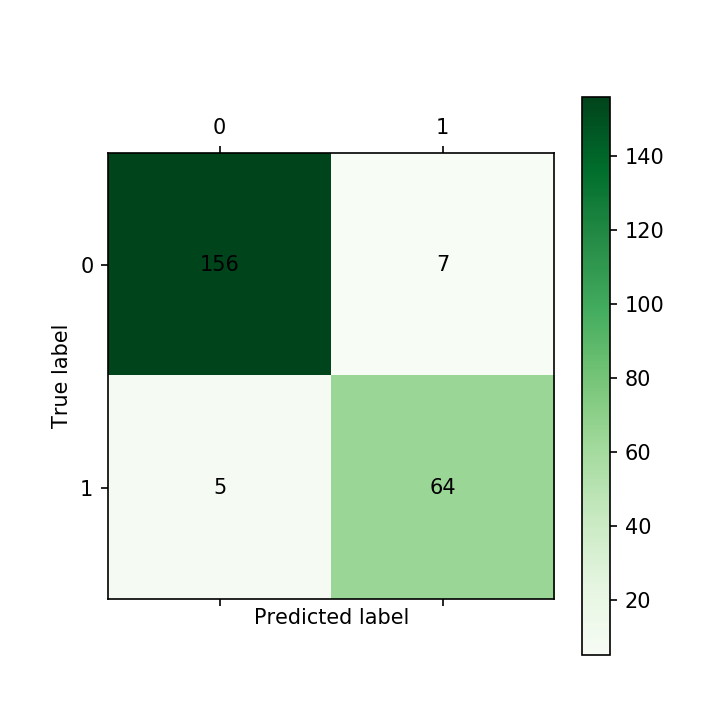

In [13]:
'''CART决策树'''
from sklearn.tree import DecisionTreeClassifier

treefile = r'D:\Python Data\chapter6\test\tmp\tree.pkl'
tree = DecisionTreeClassifier()
tree.fit(train[:, :3], train[:, 3])

from sklearn.externals import joblib
joblib.dump(tree, treefile)

from cm_plot import *
cm_plot(train[:,3], tree.predict(train[:, :3])).show()

<IPython.core.display.Javascript object>


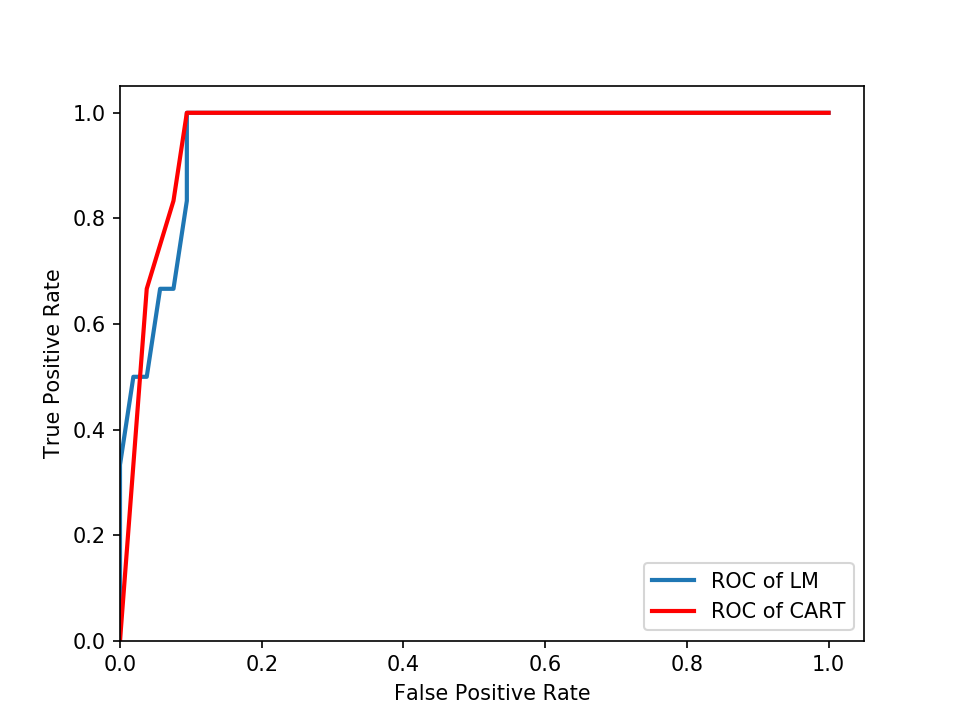

In [18]:
'''ROC曲线'''
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

predict_result = net.predict(test[:,:3]).reshape(len(test))
fpr, tpr, thresholds = roc_curve(test[:,3], predict_result, pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label='ROC of LM')
fpr2, tpr2, thresholds2 = roc_curve(test[:,3], tree.predict_proba(test[:, :3])[:, 1], pos_label=1)
plt.plot(fpr2, tpr2, linewidth=2, label='ROC of CART', c='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.legend(loc=4)
plt.show()

- 拓展思考

In [2]:
import pandas as pd
inputfile = 'chapter6/拓展思考/拓展思考样本数据.xls'
data = pd.read_excel(inputfile)

In [3]:
data.head()

,纳税人编号,销售类型,销售模式,汽车销售平均毛利,维修毛利,企业维修收入占销售收入比重,增值税税负,存货周转率,成本费用利润率,整体理论税负,整体税负控制数,办牌率,单台办牌手续费收入,代办保险率,保费返还率,输出
0,1,国产轿车,4S店,0.0635,0.3241,0.0879,0.0084,8.5241,0.0018,0.0166,0.0147,0.4000,0.02,0.7155,0.1500,正常
1,2,国产轿车,4S店,0.0520,0.2577,0.1394,0.0298,5.2782,-0.0013,0.0032,0.0137,0.3307,0.02,0.2697,0.1367,正常
2,3,国产轿车,4S店,0.0173,0.1965,0.1025,0.0067,19.8356,0.0014,0.0080,0.0061,0.2256,0.02,0.2445,0.1301,正常
3,4,国产轿车,一级代理商,0.0501,0.0000,0.0000,0.0000,1.0673,-0.3596,-0.1673,0.0000,0.0000,0.00,0.0000,0.0000,异常
4,5,进口轿车,4S店,0.0564,0.0034,0.0066,0.0017,12.8470,-0.0014,0.0123,0.0095,0.0039,0.08,0.0117,0.1872,正常


In [6]:
def get_rate(data, col):
    table = data.pivot_table('纳税人编号', index=col, columns=['输出'], aggfunc='count')
    table['rate'] = table['正常'] / table.sum(1)
    table = table.sort_values(by='rate', ascending=False)
    return table

In [7]:
get_rate(data,'销售类型')

输出,异常,正常,rate
销售类型,,,
进口轿车,5,12,0.705882
国产轿车,22,42,0.656250
其它,4,6,0.600000
工程车,1,1,0.500000
微型面包车,3,3,0.500000
卡车及轻卡,4,3,0.428571
商用货车,3,2,0.400000
大客车,11,2,0.153846


In [8]:
get_rate(data,'销售模式')

输出,异常,正常,rate
销售模式,,,
4S店,20,56,0.736842
多品牌经营店,3,4,0.571429
其它,3,2,0.400000
一级代理商,14,6,0.300000
二级及二级以下代理商,13,3,0.187500


In [61]:
def get_mean(data, col):
    return data.groupby('输出').mean()[col]

In [73]:
mean = get_mean(data, data.columns[3:-1])
(mean.diff().abs() / mean.loc['正常',:]).dropna().T.sort_values(by='正常', ascending=False)

输出,正常
维修毛利,1.149654
整体税负控制数,0.908304
汽车销售平均毛利,0.904309
代办保险率,0.687667
保费返还率,0.651494
企业维修收入占销售收入比重,0.505450
整体理论税负,0.269718
存货周转率,0.147804
办牌率,0.113657
增值税税负,0.046442


In [107]:
'''选择维修毛利、整体税负控制数、汽车销售平均毛利三个指标进行建模'''
# 选择数据
chosen = data[['维修毛利', '整体税负控制数', '汽车销售平均毛利', '输出']]
chosen.loc[:, '输出'] = pd.get_dummies(chosen.loc[:, '输出'])['异常']    # 0为正常，1为异常

In [108]:
chosen.head()

,维修毛利,整体税负控制数,汽车销售平均毛利,输出
0,0.3241,0.0147,0.0635,0
1,0.2577,0.0137,0.0520,0
2,0.1965,0.0061,0.0173,0
3,0.0000,0.0000,0.0501,1
4,0.0034,0.0095,0.0564,0


In [114]:
chosen_data = chosen.values
shuffle(chosen_data)

p = 0.8
train = chosen_data[:int(len(chosen_data * p)), :]
test = chosen_data[int(len(chosen_data) * p):, :]

Epoch 1/1000
124/124 [==============================] - 0s 2ms/step - loss: 0.6738
Epoch 2/1000
124/124 [==============================] - 0s 126us/step - loss: 0.6602
Epoch 3/1000
124/124 [==============================] - 0s 126us/step - loss: 0.6485
Epoch 4/1000
124/124 [==============================] - 0s 126us/step - loss: 0.6368
Epoch 5/1000
124/124 [==============================] - 0s 126us/step - loss: 0.6281
Epoch 6/1000
124/124 [==============================] - 0s 126us/step - loss: 0.6192
Epoch 7/1000
124/124 [==============================] - 0s 126us/step - loss: 0.6122
Epoch 8/1000
124/124 [==============================] - 0s 126us/step - loss: 0.6054
Epoch 9/1000
124/124 [==============================] - 0s 126us/step - loss: 0.5995
Epoch 10/1000
124/124 [==============================] - 0s 126us/step - loss: 0.5936
Epoch 11/1000
124/124 [==============================] - 0s 126us/step - loss: 0.5883
Epoch 12/1000
124/124 [==============================] - 0s 126us

Epoch 191/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3777
Epoch 192/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3775
Epoch 193/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3772
Epoch 194/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3771
Epoch 195/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3767
Epoch 196/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3764
Epoch 197/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3761
Epoch 198/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3759
Epoch 199/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3755
Epoch 200/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3752
Epoch 201/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3750
Epoch 202/1000
124/124 [===========================

124/124 [==============================] - 0s 0us/step - loss: 0.3412
Epoch 380/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3407
Epoch 381/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3406
Epoch 382/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3406
Epoch 383/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3404
Epoch 384/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3401
Epoch 385/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3399
Epoch 386/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3399
Epoch 387/1000
124/124 [==============================] - ETA: 0s - loss: 0.379 - 0s 126us/step - loss: 0.3397
Epoch 388/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3397
Epoch 389/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3395
Epoch 390/1000
124/124 [====================

124/124 [==============================] - 0s 126us/step - loss: 0.3290
Epoch 474/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3290
Epoch 475/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3291
Epoch 476/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3288
Epoch 477/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3287
Epoch 478/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3284
Epoch 479/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3283
Epoch 480/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3285
Epoch 481/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3285
Epoch 482/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3281
Epoch 483/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3278
Epoch 484/1000
124/124 [==============================] - 0s 0us

124/124 [==============================] - 0s 126us/step - loss: 0.3198
Epoch 569/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3196
Epoch 570/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3198
Epoch 571/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3194
Epoch 572/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3193
Epoch 573/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3192
Epoch 574/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3191
Epoch 575/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3191
Epoch 576/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3191
Epoch 577/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3188
Epoch 578/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3190
Epoch 579/1000
124/124 [==============================] - 0s 0us

124/124 [==============================] - 0s 0us/step - loss: 0.3049
Epoch 757/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3049
Epoch 758/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3048
Epoch 759/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3047
Epoch 760/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3057
Epoch 761/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3050
Epoch 762/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3048
Epoch 763/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3044
Epoch 764/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3044
Epoch 765/1000
124/124 [==============================] - 0s 126us/step - loss: 0.3047
Epoch 766/1000
124/124 [==============================] - 0s 0us/step - loss: 0.3043
Epoch 767/1000
124/124 [==============================] - 0s 0us/s

124/124 [==============================] - 0s 0us/step - loss: 0.2918
Epoch 945/1000
124/124 [==============================] - 0s 143us/step - loss: 0.2919
Epoch 946/1000
124/124 [==============================] - 0s 0us/step - loss: 0.2919
Epoch 947/1000
124/124 [==============================] - 0s 126us/step - loss: 0.2921
Epoch 948/1000
124/124 [==============================] - 0s 126us/step - loss: 0.2917
Epoch 949/1000
124/124 [==============================] - 0s 0us/step - loss: 0.2917
Epoch 950/1000
124/124 [==============================] - 0s 126us/step - loss: 0.2914
Epoch 951/1000
124/124 [==============================] - 0s 126us/step - loss: 0.2914
Epoch 952/1000
124/124 [==============================] - 0s 0us/step - loss: 0.2914
Epoch 953/1000
124/124 [==============================] - 0s 0us/step - loss: 0.2914
Epoch 954/1000
124/124 [==============================] - 0s 126us/step - loss: 0.2913
Epoch 955/1000
124/124 [==============================] - 0s 126us/s

<IPython.core.display.Javascript object>


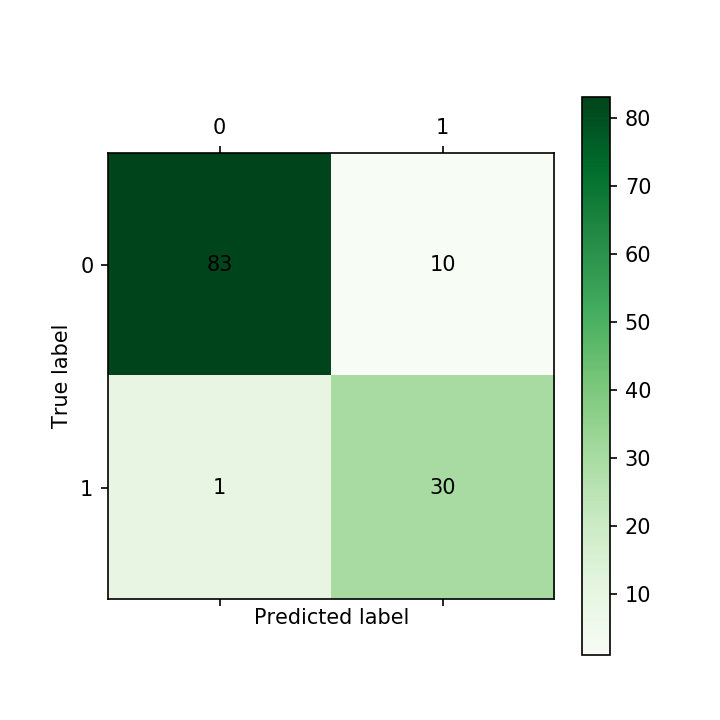

In [129]:
'''LM 神经网络'''
from keras.models import Sequential
from keras.layers.core import Dense, Activation

net = Sequential()
net.add(Dense(input_dim=3, units=10))
net.add(Activation('relu'))
net.add(Dense(input_dim=10, units=1))
net.add(Activation('sigmoid'))
net.compile(loss='binary_crossentropy', optimizer='adam')
net.fit(train[:,:3], train[:, 3], epochs=1000, batch_size=10)
predict_result = net.predict_classes(train[:, :3]).reshape(len(train))
cm_plot(train[:, 3], predict_result).show()

<IPython.core.display.Javascript object>


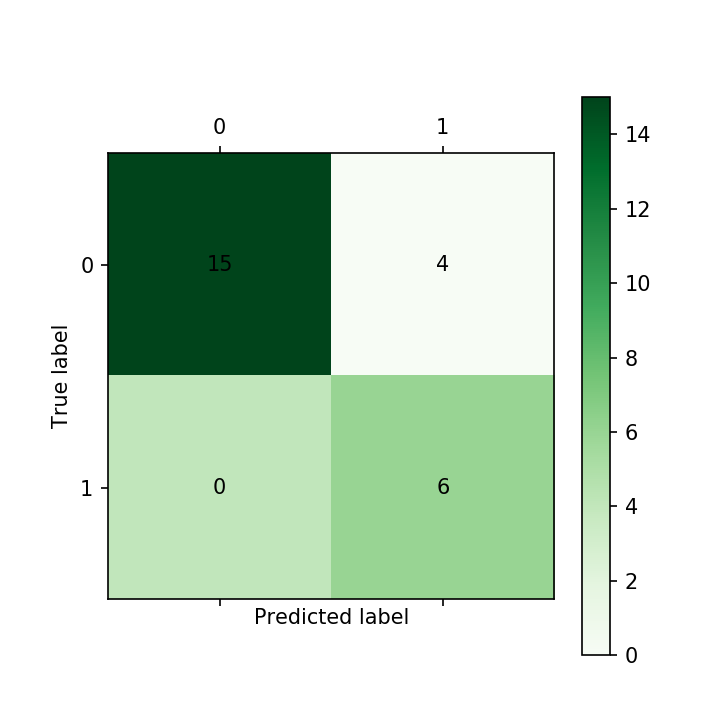

In [130]:
predict_result = net.predict_classes(test[:, :3]).reshape(len(test))
cm_plot(test[:, 3], predict_result).show()

<IPython.core.display.Javascript object>


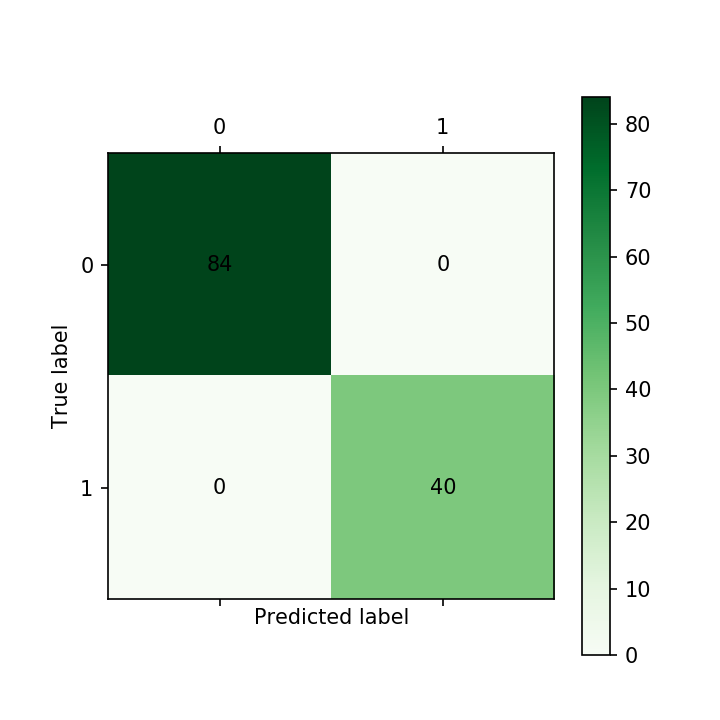

In [122]:
'''CART决策树'''
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(train[:, :3], train[:, 3])

cm_plot(train[:, 3], tree.predict(train[:, :3])).show()

<IPython.core.display.Javascript object>


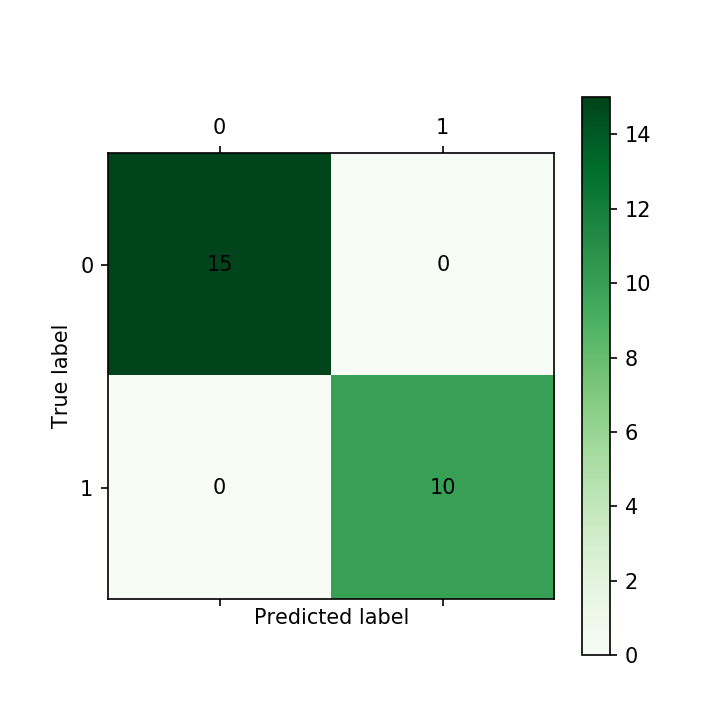

In [123]:
cm_plot(test[:, 3], tree.predict(test[:, :3])).show()

<IPython.core.display.Javascript object>


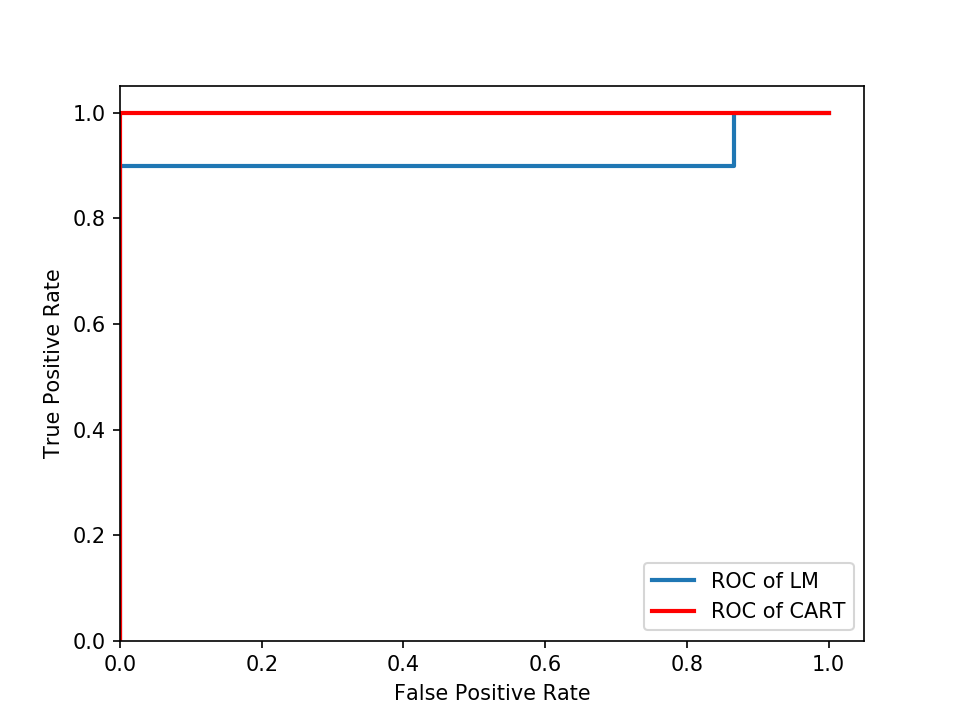

In [131]:
'''ROC曲线'''
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

predict_result = net.predict(test[:,:3]).reshape(len(test))
fpr, tpr, thresholds = roc_curve(test[:,3], predict_result, pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label='ROC of LM')
fpr2, tpr2, thresholds2 = roc_curve(test[:,3], tree.predict_proba(test[:, :3])[:, 1], pos_label=1)
plt.plot(fpr2, tpr2, linewidth=2, label='ROC of CART', c='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.legend(loc=4)
plt.show()